In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nbody import Particles, NBodySimulator
from nbody import load_files, save_movie
from numba import set_num_threads

In [2]:
# Set the number of threads to use for numba
nthreads =10
set_num_threads(nthreads)

# Problem1

In [11]:

N = 10000
tot_mass = 20
t_max = 2
dt = 0.01
mean = 0
var = 1

particles = Particles(N)
masses = np.full((N, 1), tot_mass / N)
positions = np.random.normal(mean, np.sqrt(var), (N, 3)) 
velocities = np.random.normal(mean, np.sqrt(var), (N, 3)) 
accelerations = np.random.normal(mean, np.sqrt(var), (N, 3))

# Set particle properties
particles.masses = masses
particles.positions = positions
particles.velocities = velocities
particles.accelerations = accelerations

Time: 0.00/2.01


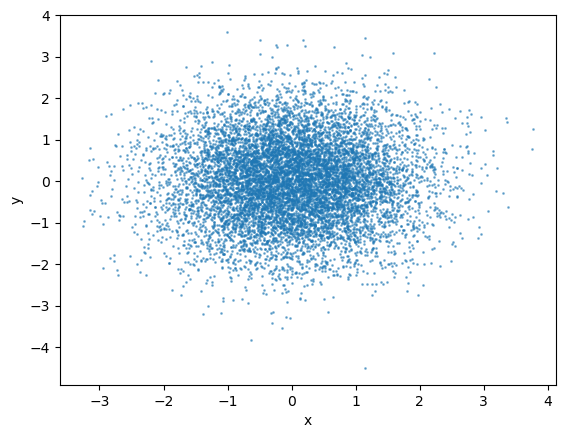

Time: 0.50/2.01


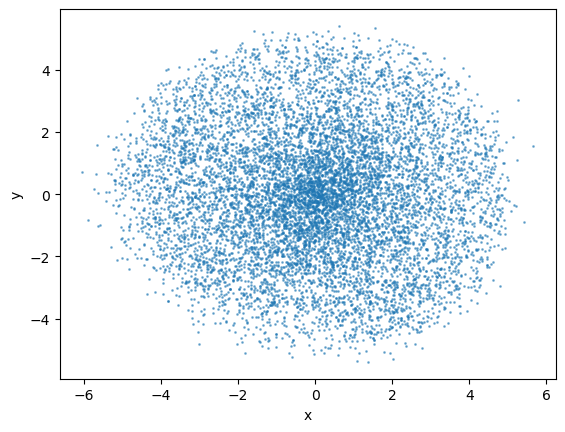

Time: 1.00/2.01


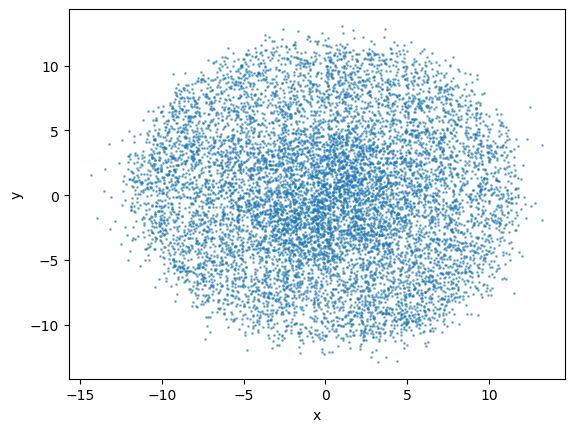

Time: 1.50/2.01


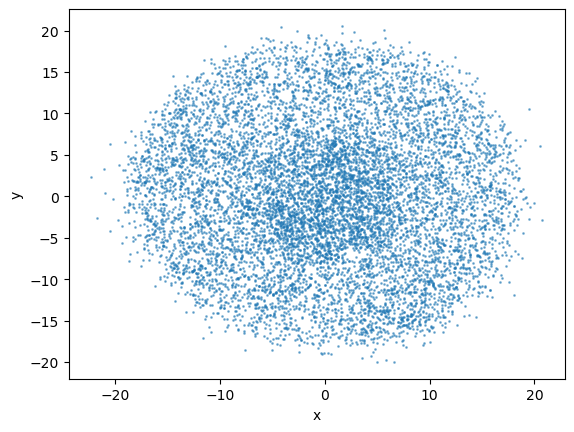

Time: 2.00/2.01


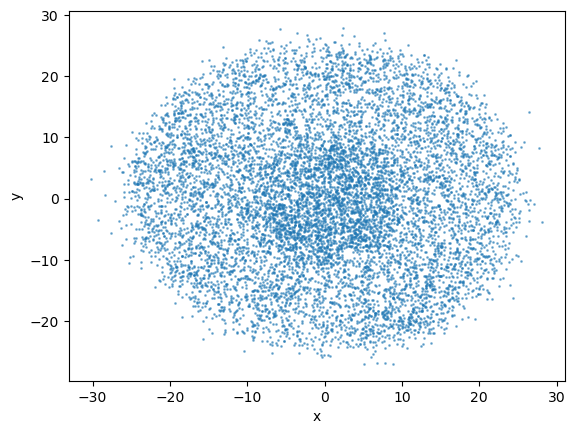

Simulation is done!


In [12]:
simulation = NBodySimulator(particles)
simulation.setup(G = 10, rsoft = 0.01, method = "Euler", io_freq = 50, visualization = True) 
simulation.evolve(dt, t_max+dt)

# Problem2

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def read_and_draw_energy(method):
    # 檔案名稱清單，抓取不同時間點的檔案
    file_names = [f"data_nbody/nbody_000{str(i).zfill(3)}.dat" for i in range(0, 200)]

    # 儲存每個時間點的能量
    kinetic_energies = []
    potential_energies = []
    total_energies = []
    # 讀取每個時間點的資料並提取能量
    for file_name in file_names:
        with open(file_name, 'r') as f:
            # 讀取檔案中的每一行
            lines = f.readlines()
            # 提取動能、位能和總能量
            for line in lines:
                if "Total Kinetic Energy" in line:
                    KE = float(line.split(":")[1].strip().split(" ")[0])
                    kinetic_energies.append(KE)
                elif "Total Potential Energy" in line:
                    PE = float(line.split(":")[1].strip().split(" ")[0])
                    potential_energies.append(PE)
                elif "Total Energy" in line:
                    TE = float(line.split(":")[1].strip().split(" ")[0])
                    total_energies.append(TE)

    # 時間步長，對應每個檔案
    time_steps = np.linspace(0, t_max, len(kinetic_energies))

    # 繪製動能、位能和總能量對時間圖
    plt.figure(figsize=(10, 6))

    # 動能對時間圖
    plt.subplot(3, 1, 1)
    plt.plot(time_steps, kinetic_energies, label='Kinetic Energy', color='r')
    plt.xlabel('Time (s)')
    plt.ylabel('Kinetic Energy (J)')
    plt.legend()

    # 位能對時間圖
    plt.subplot(3, 1, 2)
    plt.plot(time_steps, potential_energies, label='Potential Energy', color='b')
    plt.xlabel('Time (s)')
    plt.ylabel('Potential Energy (J)')
    plt.legend()

    # 總能量對時間圖
    plt.subplot(3, 1, 3)
    plt.plot(time_steps, total_energies, label='Total Energy', color='g')
    plt.xlabel('Time (s)')
    plt.ylabel('Total Energy (J)')
    plt.legend()

    plt.title(f'Energy vs. Time ({method})')
    plt.tight_layout()
    plt.show()


Time: 0.00/2.01
Time: 0.50/2.01
Time: 1.00/2.01
Time: 1.50/2.01
Time: 2.00/2.01
Simulation is done!


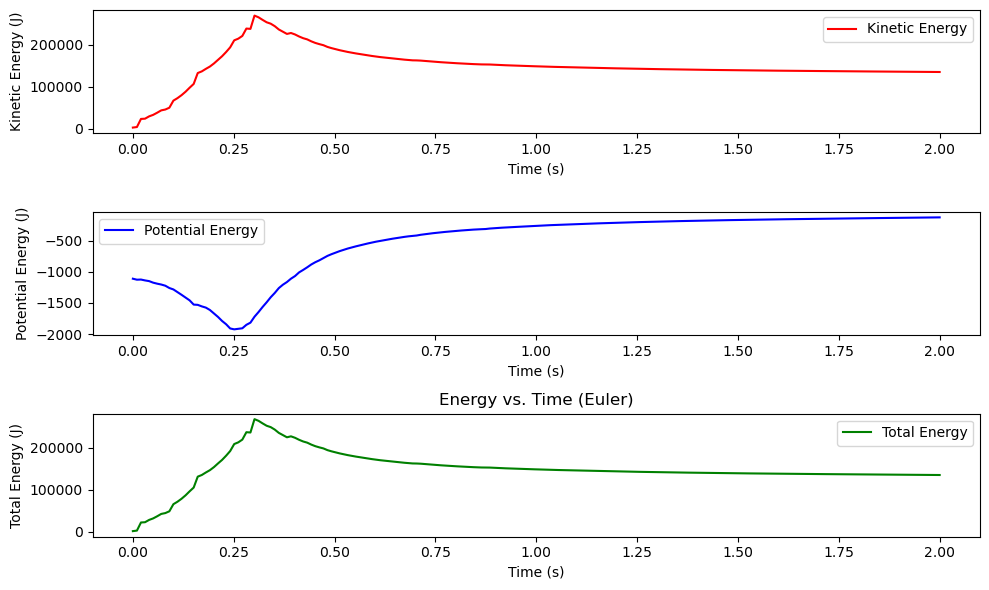

Time: 0.00/2.01
Time: 0.50/2.01
Time: 1.00/2.01
Time: 1.50/2.01
Time: 2.00/2.01
Simulation is done!


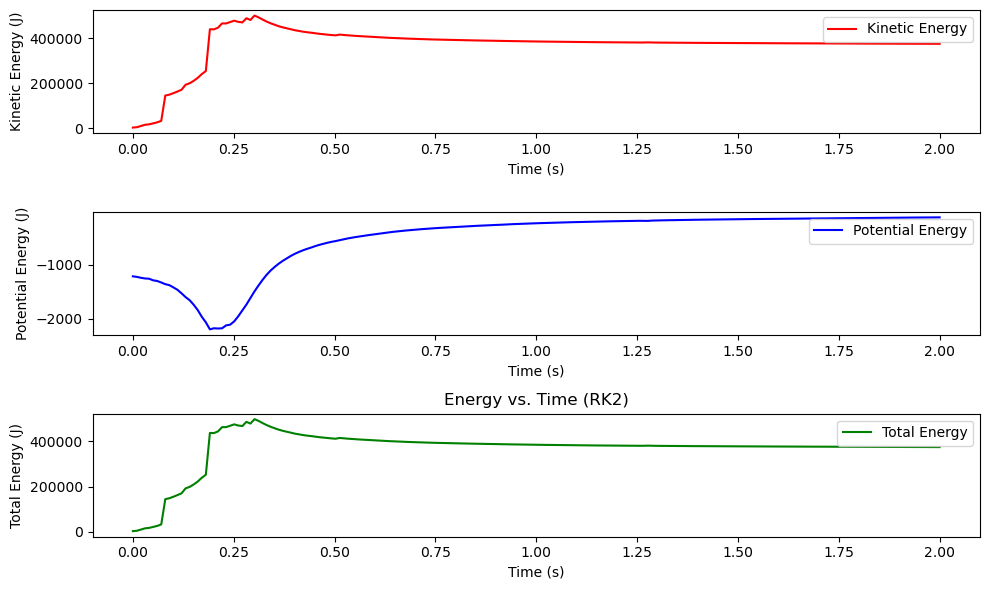

Time: 0.00/2.01
Time: 0.50/2.01
Time: 1.00/2.01
Time: 1.50/2.01
Time: 2.00/2.01
Simulation is done!


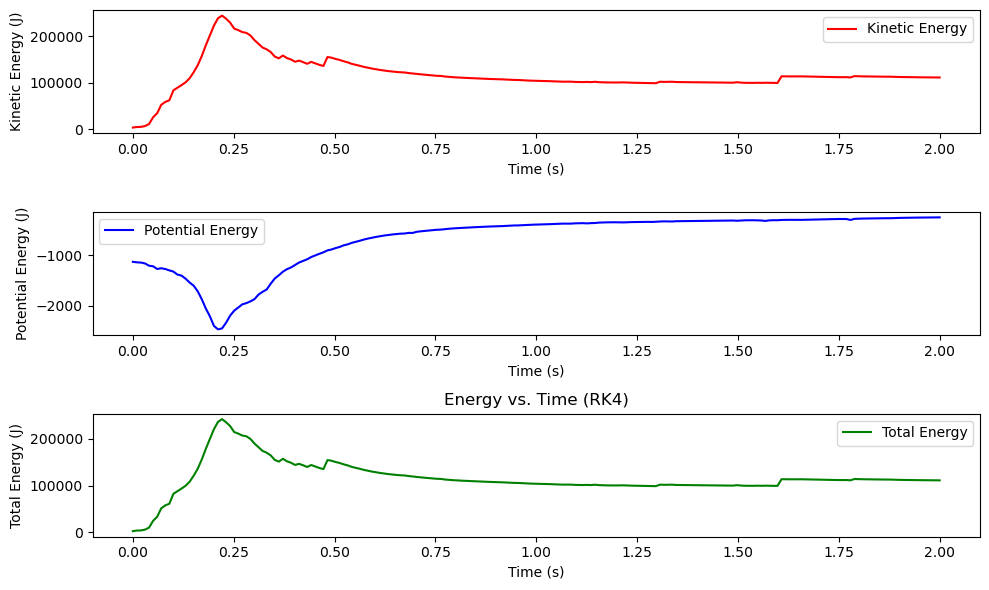

In [4]:
methods = ["Euler", "RK2", "RK4"]
for method in methods:
    N = 100
    tot_mass = 20
    t_max = 2
    dt = 0.01
    mean = 0
    var = 1

    particles = Particles(N)
    masses = np.full((N, 1), tot_mass / N)
    positions = np.random.normal(mean, np.sqrt(var), (N, 3)) 
    velocities = np.random.normal(mean, np.sqrt(var), (N, 3)) 
    accelerations = np.random.normal(mean, np.sqrt(var), (N, 3))

    # Set particle properties
    particles.masses = masses
    particles.positions = positions
    particles.velocities = velocities
    particles.accelerations = accelerations

    simulation = NBodySimulator(particles)
    simulation.setup(G = 10, rsoft = 0.01, method = method, io_freq = 50, visualization = False) 
    simulation.evolve(dt, t_max+dt)
    read_and_draw_energy(method)

It seems that energy is not conserved, which suggests there might be a calculation error somewhere, but it’s hard to pinpoint. Additionally, if N=10000, the program runs extremely slowly because the total kinetic and potential energy must be calculated at each time step, making it even slower than the first problem.